In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# ImageDataGenerator 객체 생성
Train_Datagen = ImageDataGenerator(rescale=1/255)
Test_Datagen = ImageDataGenerator(rescale=1/255)

In [21]:
train_dir = './cats_and_dogs_small/train'
test_dir = './cats_and_dogs_small/test'

In [33]:
# ImageDataGenerator 설정

train_generator = Train_Datagen.flow_from_directory(
    train_dir,               # 학습용 이미지를 가져올 폴더
    classes=['cats','dogs'], # cats 폴더의 이미지 label을 0으로 
                             # dogs 폴더의 이미지는 label을 1으로
    target_size=(150,150),   # 이미지 resize
    batch_size=20,           # 한번에 20개의 이미지만 가져와서 학습
    class_mode = 'binary'    # 이진분류인 경우 설정
)


test_generator = Test_Datagen.flow_from_directory(
    test_dir,               # 학습용 이미지를 가져올 폴더
    classes=['cats','dogs'], # cats 폴더의 이미지 label을 0으로 
                             # dogs 폴더의 이미지는 label을 1으로
    target_size=(150,150),   # 이미지 resize
    batch_size=20,           # 한번에 10개의 이미지만 가져와서 학습
    class_mode = 'binary'    # 이진분류인 경우 설정
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
model = Sequential()

In [14]:
# Convolution
model.add(Conv2D(
    filters=32,
    kernel_size=(3,3),
    strides=(1,1),
    activation='relu',
    input_shape=(150,150,3)))

In [15]:
model.add(Conv2D(
    filters=64,
    kernel_size=(3,3),
    strides=(1,1),
    activation='relu'))

In [16]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
model.add(Conv2D(
    filters=64,
    kernel_size=(3,3),
    strides=(1,1),
    activation='relu'))

In [18]:
# FC layer(DNN) 의: input layer
model.add(Flatten(input_shape=())) # 전체 4차원 에서 2차원으로 바꿔주는것

In [19]:
# hidden Layer
model.add(Dense(units=256, activation='relu'))

In [20]:
# output layer
model.add(Dense(units=1, activation='sigmoid'))

In [23]:
# model이 어떻게 동작하는지를 지정
model.compile(optimizer=Adam(learning_rate=1e-4),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [37]:
# 설정을 모두 마치었으면 모델 학습
history = model.fit(train_generator,
             steps_per_epoch = 100,
             epochs = 10,
             verbose= 1,
             validation_data = test_generator,
             validation_steps =50)

Epoch 1/10
100/100 [==============================] - 73s 733ms/step - loss: 0.2362 - accuracy: 0.9110 - val_loss: 0.7109 - val_accuracy: 0.6730
Epoch 2/10
100/100 [==============================] - 73s 734ms/step - loss: 0.1482 - accuracy: 0.9555 - val_loss: 0.7571 - val_accuracy: 0.6790
Epoch 3/10
100/100 [==============================] - 73s 734ms/step - loss: 0.1080 - accuracy: 0.9750 - val_loss: 0.8891 - val_accuracy: 0.6770
Epoch 4/10
100/100 [==============================] - 74s 742ms/step - loss: 0.0726 - accuracy: 0.9860 - val_loss: 0.9681 - val_accuracy: 0.6890
Epoch 5/10
100/100 [==============================] - 74s 736ms/step - loss: 0.0341 - accuracy: 0.9975 - val_loss: 1.1605 - val_accuracy: 0.6720
Epoch 6/10
100/100 [==============================] - 75s 746ms/step - loss: 0.0188 - accuracy: 0.9995 - val_loss: 1.1732 - val_accuracy: 0.6810
Epoch 7/10
100/100 [==============================] - 75s 746ms/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 1.2424 - val_ac

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 conv2d_3 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 322624)            0         
                                                                 
 dense (Dense)               (None, 256)               82592000  
                                                      

In [39]:
model.evaluate(test_generator)

50/50 [==============================] - 5s 105ms/step - loss: 1.4235 - accuracy: 0.6810


[1.423485517501831, 0.6809999942779541]

In [40]:
import matplotlib.pyplot as plt

In [41]:
acc = history.history['accuracy']
loss= history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

In [42]:
epochs = range(len(acc))

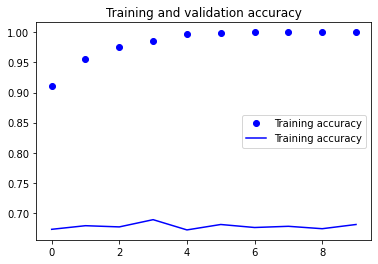

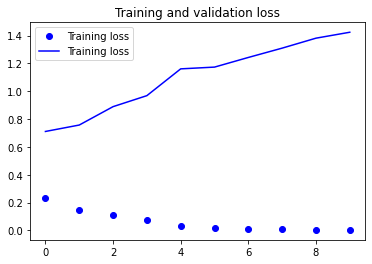

In [43]:
plt.plot(epochs, acc, 'bo', label= 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label= 'Training accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label= 'Training loss')
plt.plot(epochs, val_loss, 'b', label= 'Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()